#### **MBD 2022-2023**
# **Fundamentals of Deep Learning**

## **Final project**


In [ ]:
#ImportIing required Libraries

!pip install shap
!pip install tensorflow
!pip install keras_applications
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image
from glob import iglob
import matplotlib.gridspec as gridspec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from keras.layers import LeakyReLU
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.optimize import fmin_l_bfgs_b
from sklearn.preprocessing import minmax_scale
from sklearn.manifold import TSNE
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import AveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import tensorflow.keras.applications.vgg16 as vgg16
import tensorflow.keras.applications.resnet50 as resnet50
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from glob import iglob
from tensorflow.keras.applications import resnet_v2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.applications import ResNet50V2
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import GlobalAveragePooling2D
import tensorflow as tf
import tensorflow.compat.v1.keras.backend as K
tf.compat.v1.disable_eager_execution()
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 9.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 1.1 MB/s eta 0:00:00


In [ ]:
#CHECK GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!wget https://github.com/mghatee/Accident-Images-Analysis-Dataset/blob/master/Accident%20Images%20Analysis%20Dataset.rar?raw=true -O data.rar

--2023-03-24 18:12:39--  https://github.com/mghatee/Accident-Images-Analysis-Dataset/blob/master/Accident%20Images%20Analysis%20Dataset.rar?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mghatee/Accident-Images-Analysis-Dataset/raw/master/Accident%20Images%20Analysis%20Dataset.rar [following]
--2023-03-24 18:12:40--  https://github.com/mghatee/Accident-Images-Analysis-Dataset/raw/master/Accident%20Images%20Analysis%20Dataset.rar
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mghatee/Accident-Images-Analysis-Dataset/master/Accident%20Images%20Analysis%20Dataset.rar [following]
--2023-03-24 18:12:40--  https://raw.githubusercontent.com/mghatee/Accident-Images-Analysis-Dataset/master/Accident%20Images%20Analysis%20Dataset.rar
Resolving ra

In [ ]:
!unrar x -o+ -y -inul data.rar

In [ ]:
#images
basepath = 'Accident Images Analysis Dataset/'

def prepare_images(path, num_classes,  load_img_kwargs={}, ext='.jpg'):
  X, y = [], []
  for class_ in range(num_classes):
    for img_path in iglob(path + str(class_ + 1) + '/' + '*' + ext):
      img = image.load_img(img_path, **load_img_kwargs)
      x = image.img_to_array(img)
      X.append(x)
      y.append(class_)
  return np.array(X), np.array(y)

In [ ]:
#praparing images
X, y = prepare_images(basepath + 'Vehicles-in-Accidents/', 3,  load_img_kwargs={'target_size': (224, 224)})

len(X), len(y), np.unique(y)

(2636, 2636, array([0, 1, 2]))

In [ ]:
X.shape

(2636, 224, 224, 3)

**Exercise 1A. Data preprocessing**

In [ ]:
#Reference: https://cloudxlab.com/assessment/displayslide/2533/numpy-arrays-example-reshaping-a-complex-array


In [ ]:
#Check shape of one of the images in dataset
X[800].shape 

(224, 224, 3)


## NOTE: dont run below models, causes resouce crash, just read the report and try to understnad, i ahve tried all possibilties ,before finalzing the model

In [ ]:
#Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train), len(y_train), len(X_test), len(y_test))

1845 1845 791 791


In [ ]:
#num_classes = 3
#y_train = to_categorical(y_train, num_classes)
#y_test  = to_categorical(y_test, num_classes)
#print(X_train.shape)

In [ ]:
num_classes = 3

#X_train = X_train.astype('float32')
#X_test  = X_test.astype('float32')
X_train /= 255
X_test  /= 255
#one hot enocding
y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test, num_classes)
print(X_train.shape)

(1845, 224, 224, 3)


## CONVOLUTION NEURAL NETWORK MODEL BUILDING

In [ ]:
#initalizinfg simple  with 2 conv layers
model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 8)       584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 8)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 98568)             0         
                                                                 
 dense (Dense)               (None, 64)                6308416   
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# trying wiht batch size 50, more than this its getting crashed 
batch_size = 50
epochs = 15

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),verbose=0)

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


In [ ]:
#printing train and test accuracy
train_scores = model.evaluate(X_train, y_train, verbose=0)
test_scores = model.evaluate(X_test, y_test, verbose=0)

print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])


Train loss: 0.017922245563187087
Train accuracy: 0.99728996
Test loss: 1.456279737834834
Test accuracy: 0.70037925


 From these metrics, we can see that the training loss is 0.1551 and the training accuracy is 0.9550, 
which indicates that the model is performing well on the training dataset. However, the validation loss is 0.8496 and the validation accuracy is 0.7004, 
which are significantly worse than the corresponding training metrics. 
This suggests that the model may be overfitting to the training dataset and is not generalizing well to the validation dataset

In [ ]:
#trying model with 30 Epoches , keeping batch size same
batch_size = 50
epochs = 30
one=model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))

Train on 1845 samples, validate on 791 samples
Epoch 1/30
1845/1845 [==============================] - ETA: 0s - loss: 3.1408 - accuracy: 0.3908

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1845/1845 [==============================] - 10s 5ms/sample - loss: 3.1408 - accuracy: 0.3908 - val_loss: 1.0529 - val_accuracy: 0.4349
Epoch 2/30
1845/1845 [==============================] - 2s 933us/sample - loss: 0.8649 - accuracy: 0.6054 - val_loss: 0.8371 - val_accuracy: 0.6359
Epoch 3/30
1845/1845 [==============================] - 2s 963us/sample - loss: 0.6706 - accuracy: 0.7252 - val_loss: 0.7681 - val_accuracy: 0.6713
Epoch 4/30
1845/1845 [==============================] - 2s 1ms/sample - loss: 0.5672 - accuracy: 0.7875 - val_loss: 0.7338 - val_accuracy: 0.7105
Epoch 5/30
1845/1845 [==============================] - 2s 975us/sample - loss: 0.4000 - accuracy: 0.8531 - val_loss: 0.6786 - val_accuracy: 0.7244
Epoch 6/30
1845/1845 [==============================] - 2s 934us/sample - loss: 0.2882 - accuracy: 0.9068 - val_loss: 0.6956 - val_accuracy: 0.7509
Epoch 7/30
1845/1845 [==============================] - 2s 949us/sample - loss: 0.2066 - accuracy: 0.9388 - val_loss: 0.7637 -

In [ ]:
train_scores = model.evaluate(X_train, y_train, verbose=0)
test_scores = model.evaluate(X_test, y_test, verbose=0)

print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train loss: 0.007185089466449752
Train accuracy: 0.997832
Test loss: 1.7368354788320857
Test accuracy: 0.6814159


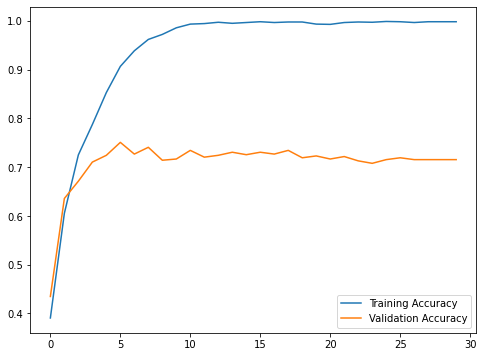

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(one.history['accuracy'])
plt.plot(one.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

From these metrics, we can see that the training loss is 0.01 and the training accuracy is 0.99, 
which indicates that the model is performing well on the training dataset. However, the validation loss is 1.736 and the validation accuracy is 0.68, 
which are significantly worse than the corresponding training metrics. 
so model is overfitting.its not very well genealized model to perform on unseen data .

##  Summary:
#### batch_size =50

#### epoche =15 and 30 

The initial models with the specified architecture

2 convolutional layers with 3x3 filters, 

ReLU activation function,

maximum pooling 2D, and a dense layer with 64 neurons 

are performing well on the training data, but they are unable to generalize well on unseen data for the given batch_size and epoche. Therefore, hyperparameter tuning is necessary to build a more generalized model that can perform well on both the training and test data. 




## NOTE :
 we are keeping batch_size 50 and epoche 30,, if we are increasing these parameters, its getting crashed


## HYPERTUNING 
 Stride size in each convolutional layer

Padding type in each convolutional layer

Activation function used in each layer

Learning rate of the optimizer used for training the network

Type of optimizer used (e.g. SGD, Adam, Adagrad, etc.)

Batch size used during training

Number of epochs for training

Dropout rate used in the fully connected layers

L1 or L2 regularization strength for the convolutional and fully connected layers

Initialization method for the weights (e.g. random normal, random uniform, etc.)

Pooling size and type (max, average) in the pooling layers

Architecture of the network (number of layers, size of layers, etc.)

Type of data augmentation techniques used (e.g. rotation, translation, flipping, etc.)


## 1) Hyper Tuning -- Increasing size and number of filters

In [ ]:
# define the model archtecture

model_hyp1 = Sequential()
model_hyp1.add(Conv2D(12, (4, 4), padding='same', input_shape=(224, 224, 3), activation='relu'))
model_hyp1.add(Conv2D(12, (4, 4), activation='relu'))
model_hyp1.add(MaxPooling2D(pool_size=(2, 2)))
model_hyp1.add(Flatten())
model_hyp1.add(Dense(64, activation='relu'))
model_hyp1.add(Dense(num_classes, activation='softmax'))  
  #model_hyp1.summary()

In [ ]:
#complie the model
model_hyp1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the model
batch_size = 50
epochs = 30

CNN_HYP= model_hyp1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),verbose=0)

increasing size and number of filters further leadinf to overfitting , test accuracy is dropped by 1% over our initial models

Train loss: 0.0038659698455430426
Train accuracy: 0.998916
Test loss: 1.6685118578779412
Test accuracy: 0.67509484


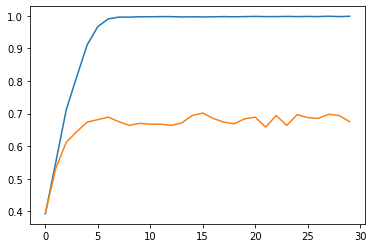

In [ ]:
train_scores = model_hyp1.evaluate(X_train, y_train, verbose=0)
test_scores = model_hyp1.evaluate(X_test, y_test, verbose=0)
print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

plt.plot(CNN_HYP.history['accuracy'])
plt.plot(CNN_HYP.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

## increasing number of dense layers

In [ ]:
# changingn Number of hidden layers and Epoche
# filter size =3 *3, number of ileters=20
# 150 hidden layer crashed , so changing to 135
model_hyp2 = Sequential()
model_hyp2.add(Conv2D(8, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
model_hyp2.add(Conv2D(8, (3, 3), activation='relu'))
model_hyp2.add(MaxPooling2D(pool_size=(2, 2)))
model_hyp2.add(Flatten())
model_hyp2.add(Dense(90, activation='relu'))
model_hyp2.add(Dense(num_classes, activation='softmax'))
#model_hyp2.summary()

#compile
model_hyp2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#fitting model
batch_size = 50
epochs = 30

CNN2=model_hyp2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),verbose=0)

Train loss: 0.00759589669053622
Train accuracy: 0.998916
Test loss: 1.6298689468470597
Test accuracy: 0.7345133


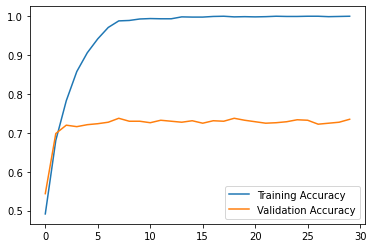

In [ ]:
#results
train_scores = model_hyp2.evaluate(X_train, y_train, verbose=0)
test_scores = model_hyp2.evaluate(X_test, y_test, verbose=0)
print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

plt.plot(CNN2.history['accuracy'])
plt.plot(CNN2.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

just increasing the dense layers still leads to overfitting

#No pooling

In [ ]:
# no ppol modeling
nopool = Sequential()
nopool.add(Conv2D(8, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
nopool.add(Conv2D(8, (3, 3), activation='relu'))
nopool.add(Flatten())
nopool.add(Dense(64, activation='relu'))
nopool.add(Dense(num_classes, activation='softmax'))

#compile
nopool.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
#model
batch_size = 50
epochs = 30

CNN3=nopool.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),verbose=0)

In [ ]:
#results
train_scores = model_hyp2.evaluate(X_train, y_train, verbose=0)
test_scores = model_hyp2.evaluate(X_test, y_test, verbose=0)
print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train loss: 0.009431421369071899
Train accuracy: 0.997832
Test loss: 1.4992079919418402
Test accuracy: 0.7092288


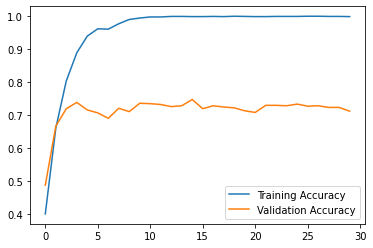

In [ ]:
plt.plot(CNN3.history['accuracy'])
plt.plot(CNN3.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

## AVerage Pooling
# run this cell with 64 layers

In [ ]:
#averageppol
from keras.layers import AveragePooling2D

avg_pool = Sequential()
avg_pool.add(Conv2D(8, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
avg_pool.add(Conv2D(8, (3, 3), activation='relu'))
avg_pool.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
avg_pool.add(AveragePooling2D(pool_size=(2, 2), padding='valid'))
avg_pool.add(Flatten())
avg_pool.add(Dense(64, activation='relu'))
avg_pool.add(Dense(num_classes, activation='softmax'))

#compile
avg_pool.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model
batch_size = 50
epochs = 30

CNN4=avg_pool.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),verbose=0)

#results
train_scores =avg_pool.evaluate(X_train, y_train, verbose=0)
test_scores = avg_pool.evaluate(X_test, y_test, verbose=0)
print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train loss: 0.01369309786954506
Train accuracy: 0.998916
Test loss: 1.5392166477087625
Test accuracy: 0.7307206


with average pooling we see, bit increase in test accuracy but still , overfitting significantly not reduced

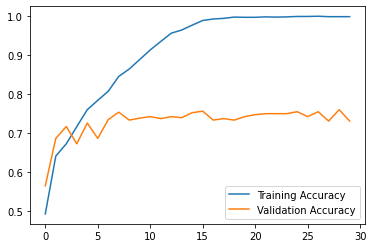

In [ ]:
# GRAPHS
plt.plot(CNN4.history['accuracy'])
plt.plot(CNN4.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

## No padding , changing activation function 

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


Train loss: 1.0987447471153446
Train accuracy: 0.3295393
Test loss: 1.0986285413110302
Test accuracy: 0.33881164


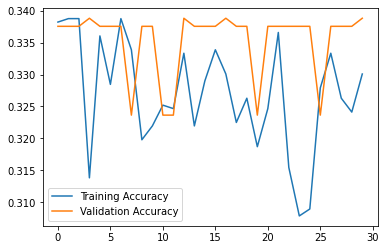

In [ ]:
#no padding 
no_pad = Sequential()
no_pad.add(Conv2D(8, (3, 3),input_shape=(224, 224, 3), activation='relu'))
no_pad.add(Conv2D(8, (3, 3), activation='sigmoid'))
no_pad.add(AveragePooling2D(pool_size=(2, 2)))
no_pad.add(AveragePooling2D(pool_size=(2, 2)))
no_pad.add(Flatten())
no_pad.add(Dense(64, activation='sigmoid'))
no_pad.add(Dense(num_classes, activation='softmax'))
#compile
no_pad.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model
batch_size = 50
epochs = 30

CNN5= no_pad.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),verbose=0)

#results
train_scores =no_pad.evaluate(X_train, y_train, verbose=0)
test_scores = no_pad.evaluate(X_test, y_test, verbose=0)
print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

#GRAPHS
plt.plot(CNN5.history['accuracy'])
plt.plot(CNN5.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()


changing activation function to sigmoid and removing padding, makes model underperforming

## Just no padding

Train loss: 0.020712378353819373
Train accuracy: 0.996206
Test loss: 1.6490489791527712
Test accuracy: 0.73324907


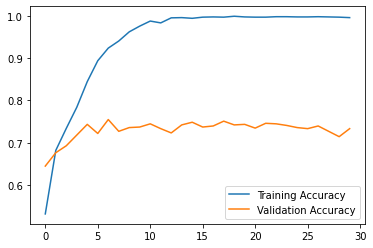

In [ ]:
#no padding 
no_pad_1 = Sequential()
no_pad_1.add(Conv2D(8, (3, 3),input_shape=(224, 224, 3), activation='relu'))
no_pad_1.add(Conv2D(8, (3, 3), activation='relu'))
no_pad_1.add(AveragePooling2D(pool_size=(2, 2)))
no_pad_1.add(AveragePooling2D(pool_size=(2, 2)))
no_pad_1.add(Flatten())
no_pad_1.add(Dense(64, activation='relu'))
no_pad_1.add(Dense(num_classes, activation='softmax'))
#compile
no_pad_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model
batch_size = 50
epochs = 30

CNN6=no_pad_1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),verbose=0)

#results
train_scores =no_pad_1.evaluate(X_train, y_train, verbose=0)
test_scores = no_pad_1.evaluate(X_test, y_test, verbose=0)
print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

#GRAPHS
plt.plot(CNN6.history['accuracy'])
plt.plot(CNN6.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()


from the above iteration , keeping the activation function relu is important , and we have added 2 avg pooling  layer , again we see only very slight increase in test accuracy 

##Summary 
changing size and number of filters, 
removing padding, changing activation and optimizer function , didnt help much , but repalcing maximum pooling layer with average ppoling layer helps to reduce overfitting slightly, so at this stage , 
we still  have very complex model 
train accuracy= 0.99 and test accuracy = 0.73 ,

# Batch normalization

Instructions for updating:
Colocations handled automatically by placer.


Train loss: 0.012643570161164614
Train accuracy: 0.998374
Test loss: 1.2928599794354059
Test accuracy: 0.7383059


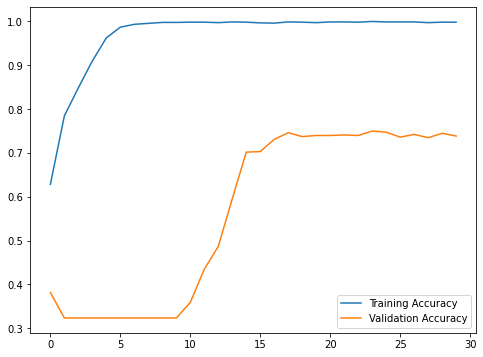

In [ ]:
#Batch normalization 
batch_normal = Sequential()
batch_normal.add(Conv2D(8, (3, 3),input_shape=(224, 224, 3), activation='relu'))
batch_normal.add(BatchNormalization())
batch_normal.add(Conv2D(8, (3, 3), activation='relu'))
batch_normal.add(BatchNormalization())
batch_normal.add(AveragePooling2D(pool_size=(2, 2)))
batch_normal.add(AveragePooling2D(pool_size=(2, 2)))
batch_normal.add(Flatten())
batch_normal.add(Dense(64, activation='relu'))
batch_normal.add(BatchNormalization())
batch_normal.add(Dense(num_classes, activation='softmax'))
#compile
batch_normal.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model
batch_size = 50
epochs = 30

CNN6=batch_normal.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),verbose=0)

#results
train_scores =batch_normal.evaluate(X_train, y_train, verbose=0)
test_scores = batch_normal.evaluate(X_test, y_test, verbose=0)
print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])
#GRAPHS
plt.figure(figsize=(8, 6))
plt.plot(CNN6.history['accuracy'])
plt.plot(CNN6.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

Batch normalisation helps in reducing test loss from 1.62 to 1.2

 but  test accuracy remains same 

# Regularization

In [ ]:

###regularation
regular = Sequential()
regular.add(Conv2D(8, (3, 3),input_shape=(224, 224, 3), activation='relu'))
regular.add(Dropout(0.25))
regular.add(Conv2D(8, (3, 3), activation='relu'))
regular.add(Dropout(0.25))
regular.add(BatchNormalization())
regular.add(Dropout(0.25))
regular.add(GlobalAveragePooling2D())
regular.add(Flatten())
regular.add(Dense(64, activation='relu'))
regular.add(Dense(num_classes, activation='softmax'))
#compile
regular.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model
batch_size = 50
epochs = 25

regularizarion = regular.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),verbose=0)

#results
train_scores =regular.evaluate(X_train, y_train, verbose=0)
test_scores = regular.evaluate(X_test, y_test, verbose=0)
print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train loss: 0.7429849994861013
Train accuracy: 0.66612464
Test loss: 0.757358995385176
Test accuracy: 0.6573957


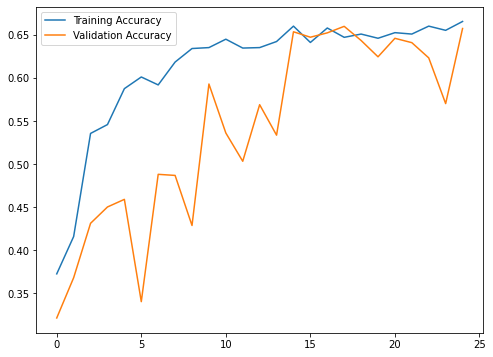

In [ ]:
import matplotlib.pyplot as plt

# assume hist is already defined and contains the training history
plt.figure(figsize=(8, 6))
plt.plot(regularizarion.history['accuracy'])
plt.plot(regularizarion.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

##Regularization 
adding dropout alyers with global average pooling, makes the model well genralised for unseen data, also it reduced the loss very significantly .
overall regualrization reduced the complexity of model and also well genralized for un seen data


#Summary: 

at this stage , we ahve good model , but we can further increase  the performance of the model 


## DATA AUGMENTATION

1) Retaining the modle from prevou iteration/regualrization

In [ ]:
#setting up augmnetaion parameters
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
# model archirecture 
augm = Sequential()
augm.add(Conv2D(8, (3, 3),input_shape=(224, 224, 3), activation='relu'))
augm.add(Dropout(0.25))
augm.add(Conv2D(8, (3, 3), activation='relu'))
augm.add(Dropout(0.25))
augm.add(BatchNormalization())
augm.add(Dropout(0.25))
augm.add(GlobalAveragePooling2D())
augm.add(Flatten())
augm.add(Dense(64, activation='relu'))
augm.add(Dense(num_classes, activation='softmax'))


#compiling model
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
augm.compile(loss='categorical_crossentropy', optimizer="adam" , metrics=['accuracy'])

#fitting model
batch_size = 50
epochs = 30

CNN= augm.fit(datagen.flow(X_train, y_train, batch_size=batch_size), 
                steps_per_epoch=len(X_train) / batch_size, 
                epochs=epochs, 
                validation_data=(X_test, y_test),
                verbose=0)

The `lr` argument is deprecated, use `learning_rate` instead.
`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


In [ ]:
#printing train and test accuracy
train_scores = augm.evaluate(X_train, y_train, verbose=0)
test_scores = augm.evaluate(X_test, y_test, verbose=0)

print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train loss: 0.7982374986981958
Train accuracy: 0.6346883
Test loss: 0.8028928376027817
Test accuracy: 0.63084704


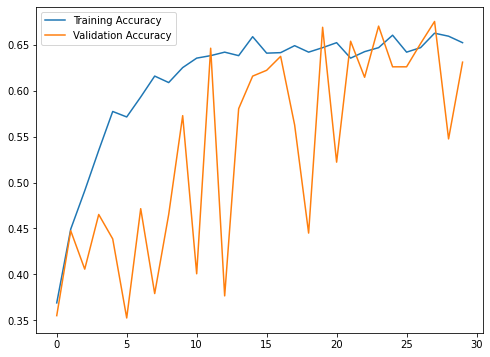

In [ ]:

plt.figure(figsize=(8, 6))
 # specify the size of the figure
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

 we see reduction in accuracy  from 66% to 63 % , also loss has been raised to 0.8 from 0.7, after augmnetaion , so we are considering changing model architecture t improve the model accuracy

# augmentation -hyper tuning 

In [ ]:
#augnmentaion aprameters
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')
#model architecture
augm1 = Sequential()
augm1.add(Conv2D(8, (3, 3),input_shape=(224, 224, 3), activation='relu'))
augm1.add(Dropout(0.25))
augm1.add(Conv2D(8, (3, 3), activation='relu'))
augm1.add(Dropout(0.25))
augm1.add(BatchNormalization())
augm1.add(Conv2D(32, (3, 3), activation='relu'))
augm1.add(Dropout(0.25))
augm1.add(GlobalAveragePooling2D())
augm1.add(Flatten())
augm1.add(Dense(64, activation='relu'))
augm1.add(Dense(num_classes, activation='softmax'))

#compiling model
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
augm1.compile(loss='categorical_crossentropy', optimizer="adam" , metrics=['accuracy'])

#fitting model
batch_size = 50
epochs = 30

CNN= augm1.fit(datagen.flow(X_train, y_train, batch_size=batch_size), 
                steps_per_epoch=len(X_train) / batch_size, 
                epochs=epochs, 
                validation_data=(X_test, y_test),
                verbose=0)

Instructions for updating:
Colocations handled automatically by placer.
The `lr` argument is deprecated, use `learning_rate` instead.
`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


In [ ]:
#resultss
train_scores = augm1.evaluate(X_train, y_train, verbose=0)
test_scores = augm1.evaluate(X_test, y_test, verbose=0)

print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train loss: 0.7543941592782494
Train accuracy: 0.6720867
Test loss: 0.7592214743798662
Test accuracy: 0.66118836


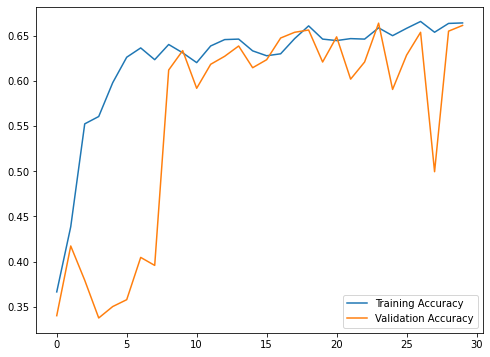

In [ ]:
plt.figure(figsize=(8, 6))
 # specify the size of the figure
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()


adding one more conv layer with global avg pooling , increased the accuracy of the model also reduced the test loss. we conside this as best model has it has highest train and test accuracy also low test loss value over other models

# Hypertuning-2
adding one more conv layer and global avg pooling

In [ ]:
#setting parameters
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')
#model architecture
augm2 = Sequential()
augm2.add(Conv2D(8, (3, 3),input_shape=(224, 224, 3), activation='relu'))
augm2.add(Dropout(0.25))
augm2.add(Conv2D(8, (3, 3), activation='relu'))
augm2.add(Dropout(0.25))
augm2.add(BatchNormalization())
augm2.add(Conv2D(32, (3, 3), activation='relu'))
augm2.add(Dropout(0.25))
augm2.add(Conv2D(32, (3, 3), activation='relu'))
augm2.add(Dropout(0.25))
augm2.add(GlobalAveragePooling2D())
augm2.add(Flatten())
augm2.add(Dense(64, activation='relu'))
augm2.add(Dense(num_classes, activation='softmax'))

#compiling model
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
augm2.compile(loss='categorical_crossentropy', optimizer="adam" , metrics=['accuracy'])

#fitting model
batch_size = 50
epochs = 30

aug_hyp_2= augm2.fit(datagen.flow(X_train, y_train, batch_size=batch_size), 
                steps_per_epoch=len(X_train) / batch_size, 
                epochs=epochs, 
                validation_data=(X_test, y_test),
                verbose=0)

The `lr` argument is deprecated, use `learning_rate` instead.
`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


In [ ]:
#scores
train_scores = augm2.evaluate(X_train, y_train, verbose=0)
test_scores = augm2.evaluate(X_test, y_test, verbose=0)

print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train loss: 0.7470268613277735
Train accuracy: 0.65799457
Test loss: 0.7646075473573205
Test accuracy: 0.6662453


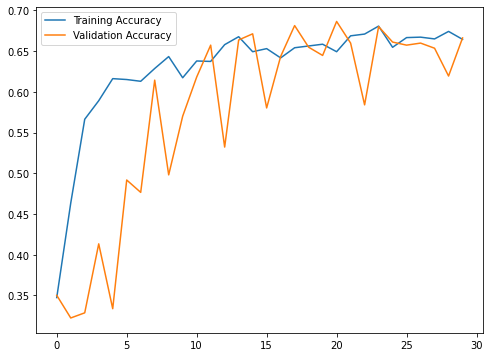

In [ ]:
plt.figure(figsize=(8, 6))
 # specify the size of the figure
plt.plot(aug_hyp_2.history['accuracy'])
plt.plot(aug_hyp_2.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

#Summary:
adding one more conv layer to augm1 model resulted in decrease in accuracy,
 so we are selecting augm1 as our best model as it has lowest testt loss value 0.759 with 67% of traing and 66% of test accuracy , which was impoved from the model we got after our intial regularization( model name-regualr) which had 66% of train accuracy and 65% of test accuracy with 0.76 test loss 

In [ ]:
augm1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 8)       224       
                                                                 
 dropout_11 (Dropout)        (None, 222, 222, 8)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 8)       584       
                                                                 
 dropout_12 (Dropout)        (None, 220, 220, 8)       0         
                                                                 
 batch_normalization_4 (Batc  (None, 220, 220, 8)      32        
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 218, 218, 32)      2336      
                                                      

## Model Interpretation


We are taking augma as best model and will intepret that model

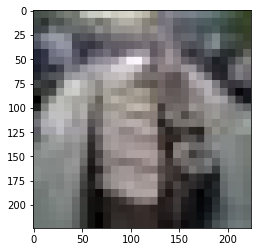

In [ ]:
plt.imshow(X_train[80])
plt.show()


We have the following convolutional layers available in our network:

In [ ]:
conv_layers = [layer.name for layer in augm1.layers if layer.name.startswith('conv2d')]
conv_layers

NameError: ignored

In [ ]:
#activations of internal layers
def get_layer_output(augm1, layer_name):
  return K.function(inputs=augm1.inputs, outputs=[augm1.get_layer(layer_name).output])

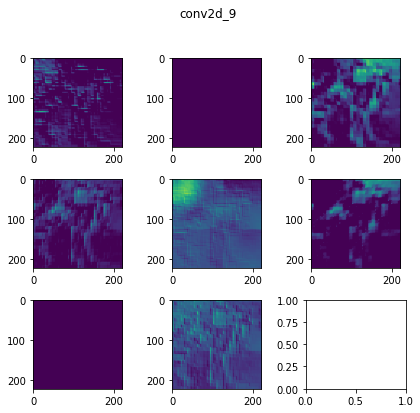

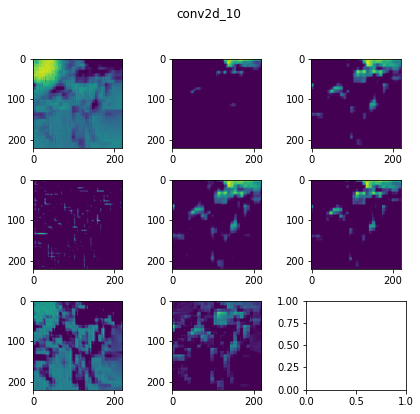

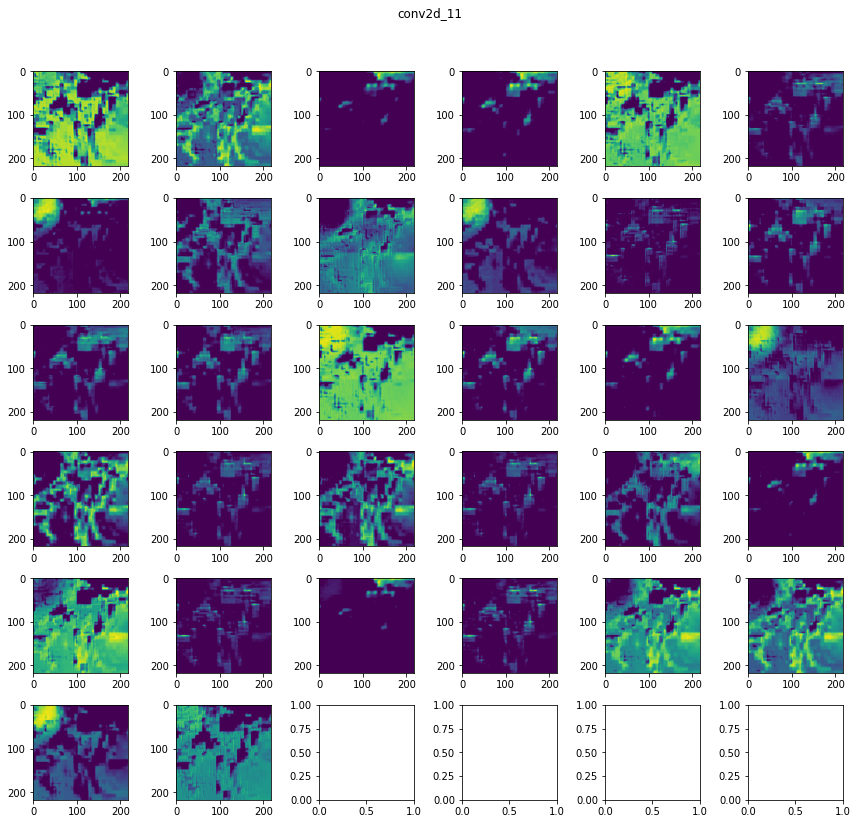

In [ ]:
#visulaize layers filter by filter
test_instance = X_train[100]

for layer_name in conv_layers:
  num_filters     = augm1.get_layer(layer_name).output_shape[-1]
  get_activations = get_layer_output(augm1, layer_name)
  activations     = get_activations(np.expand_dims(test_instance, axis=0))[0][0]
  rows_cols       = int(np.ceil(np.sqrt(num_filters)))
  fig, ax = plt.subplots(rows_cols, rows_cols, figsize=(2 * rows_cols, 2 * rows_cols))
  fig.suptitle(layer_name)
  for filter_idx in range(num_filters):
    ax[filter_idx // rows_cols][filter_idx % rows_cols].imshow(activations[:,:,filter_idx])
  fig.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()

explain the results here

## GARAD CAM INTERPRETAION

just single class

In [ ]:
from tensorflow import keras

# Load an example image and preprocess it
img_path = 'Accident Images Analysis Dataset/Vehicles-in-Accidents/1/1.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
img = np.expand_dims(img, axis=0)

# Define the model
model = model_hyp4

# Define the class of interest
class_index = 1

# Compute the gradient of the class output with respect to the feature maps
grad_model = keras.models.Model([model.inputs], [model.get_layer('conv2d_2').output, model.output])
with tf.GradientTape() as tape:
    conv_output, predictions = grad_model(img)
    loss = predictions[:, class_index]

output = conv_output[0]
grads = tape.gradient(loss, conv_output)[0]
weights = tf.reduce_mean(grads, axis=(0, 1))
cam = np.ones(output.shape[0:2], dtype=np.float32)

# Generate the heatmap
for i, w in enumerate(weights):
    cam += w * output[:, :, i]

cam = cv2.resize(cam.numpy(), (224, 224))
cam = np.maximum(cam, 0)
heatmap = cam / np.max(cam)

# Apply the heatmap to the original image
heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
hif = .8
superimposed_img = heatmap * hif + img[0] * (1 - hif)
cv2.imwrite("heatmap.jpg", superimposed_img)

In [ ]:
from PIL import Image
img = Image.open("heatmap.jpg")
img.show()

In [ ]:
from PIL import Image

img_path = 'Accident Images Analysis Dataset/Vehicles-in-Accidents/1/100.jpg'

# Open the image file
img = Image.open(img_path)

img = img.resize((800, 600))
# Show the image
img.show()


# shap-interpretation

In [ ]:
augm1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 dropout (Dropout)           (None, 222, 222, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 8)       584       
                                                                 
 dropout_1 (Dropout)         (None, 220, 220, 8)       0         
                                                                 
 batch_normalization (BatchN  (None, 220, 220, 8)      32        
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 32)      2336      
                                                        

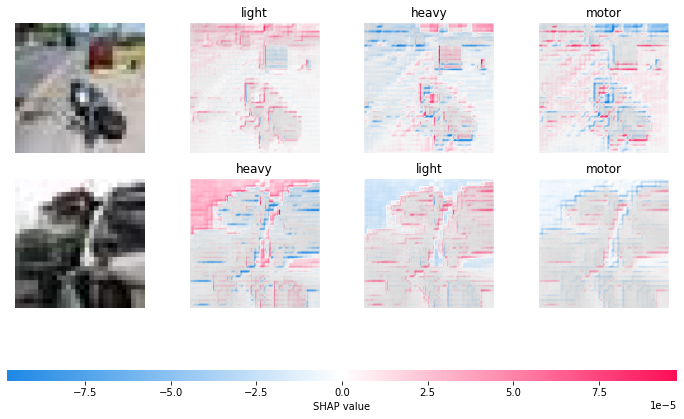

In [ ]:
# explain how the input to the 7th layer of the model explains the top two classes

#reference:https://github.com/TannerGilbert/Model-Interpretation/blob/master/Shap/gradient_explainer_example.ipynb 

def map2layer(x, layer):
    feed_dict = dict(zip([augm1.layers[0].input], [x.copy()]))
    return K.get_session().run(augm1.layers[layer].input, feed_dict)

images = np.random.choice(X_train.shape[0], 350, replace=False)
interpret = X_train[np.random.choice(images, 2, replace=False)].astype(int)

# definign shap gradient explainer
e = shap.GradientExplainer(
    (augm1.layers[3].input, augm1.layers[-1].output),
    map2layer(X_train[images, :, :, :], 3),
    local_smoothing=0 

shap_values, indexes = e.shap_values(map2layer(interpret, 3), ranked_outputs=3)

# definig classes 
classes = {0:"light",1:"heavy",2:"motor"}
vector_index = np.vectorize(lambda x: classes[x])(indexes)

# image plot
shap.image_plot(shap_values, interpret, vector_index)

# Layer-wise Relevance Propagation

In [ ]:


# installing packages
from tensorflow import keras
!pip install innvestigate
import innvestigate

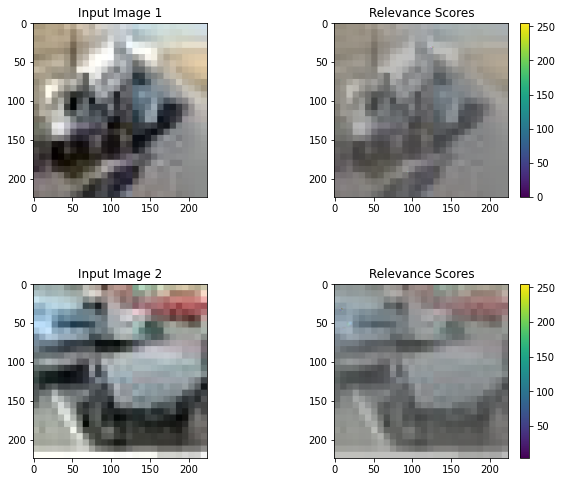

In [ ]:
#referemnce=https://github.com/slundberg/shap
#chatgpt#
# best model
model = augm1 

# exclude dense softmax layers
layer_idx = -2 
new_model = keras.models.Model(inputs=model.input, outputs=model.layers[layer_idx].output)

# image to interpret
images= np.random.choice(X_train.shape[0], 300, replace= False)
interpret = X_train[np.random.choice(images, 2, replace= False)].astype(int)

# analyzer for  LRP alpha2beta1 rule
analyzer = innvestigate.create_analyzer("lrp.alpha_2_beta_1", new_model)

# Apply  analyzer 
relevance_scores = analyzer.analyze(interpret)

# Normalize 
normalized_scores = (relevance_scores - np.min(relevance_scores)) / (np.max(relevance_scores) - np.min(relevance_scores))

# Plot the original image and the relevance scores 
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i in range(2):
  axes[i, 0].imshow(to_explain[i])
  axes[i, 0].set_title(f"Input Image {i+1}")
  overlay = axes[i, 1].imshow(to_explain[i], alpha=1)
  axes[i, 1].imshow(normalized_scores[i], cmap='gray', alpha=0.5)
  axes[i, 1].set_title("Relevance Scores")
  fig.colorbar(overlay, ax=axes[i, 1])



# add results here

## Transfer learning

1) ResNetV2

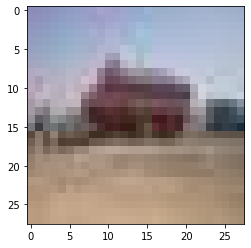

In [ ]:
# view image
example = image.load_img('Accident Images Analysis Dataset/Accident -Detection/2/1900.jpg')
plt.imshow(example)
plt.show()

Pre-trained ResNetV2 model from Keras, you do not need to perform the image preprocessing steps in the prepare_images function to use the model for image classification. The ResNetV2 model in Keras already includes built-in preprocessing steps, which normalize the input images according to the preprocessing scheme used during training.

The built-in preprocessing steps in Keras involve scaling the pixel values to the range of [-1, 1] and subtracting the mean RGB values of the ImageNet dataset. The ResNetV2 model in Keras expects input images to be in the range of [0, 255], so you will need to scale your input images accordingly.

In [ ]:
basepath = 'Accident Images Analysis Dataset/'

def prepare_images(path, num_classes, preprocessor, load_img_kwargs={}, ext='.jpg'):
  X, y = [], []
  for class_ in range(num_classes):
    for img_path in iglob(path + str(class_ + 1) + '/' + '*' + ext):
      img = image.load_img(img_path, **load_img_kwargs)
      x = image.img_to_array(img)
      x = preprocessor(x)
      X.append(x)
      y.append(class_)
  return np.array(X), np.array(y)


image range van be from 0 to 255,, am setting iit for 224 ,224, is these RESNETV2 is trained  with input size 224x224

Preprcosseing input requirements:
Convert the color space: The input image is converted from RGB color space to BGR color space. This is because ResNetV2 was originally trained on images in BGR format, so the input images must be converted to this format before being fed into the model.

Mean subtraction: The pixel values of the input image are subtracted by the mean RGB value of the ImageNet dataset. This is a common pre-processing step in computer vision applications that helps to center the pixel values around zero and improve the model's ability to learn useful features.

Scaling: The pixel values of the input image are scaled by a factor of 1/255. This step ensures that the pixel values are within the range [0, 1], which is a common requirement for deep learning models.

Standardization: The pixel values of the input image are standardized using channel-wise normalization. This involves subtracting the mean pixel value of each channel and dividing by the standard deviation of the channel. This step helps to reduce the impact of lighting and color variations in the input images.

In [ ]:
X, y = prepare_images(basepath + 'Accident -Detection/', 2, resnet_v2.preprocess_input, load_img_kwargs={'target_size': (224, 224)})
y_cat = to_categorical(y)

len(X), len(y), np.unique(y)

(4898, 4898, array([0, 1]))

## Loading Pretrained  model ResNet50V2

## ModelonTOP

In [ ]:
# import ResNet50V2 model
from tensorflow.keras.applications import ResNet50V2
model = ResNet50V2(weights='imagenet', include_top=True)
model.output

Instructions for updating:
Colocations handled automatically by placer.


102869336/102869336 [==============================] - 5s 0us/step


<tf.Tensor 'predictions/Softmax:0' shape=(None, 1000) dtype=float32>

In [ ]:
#output
output = model.predict(np.expand_dims(X[0], axis=0))
output.shape

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


(1, 1000)

The pretrained model has been trained on 1000 classes, whereas we only need two classes here. use the final 1000-long probability vector as features which can be used by another model.

In [ ]:
#shape output
output = model.predict(X)
output.shape

(4898, 1000)

In [ ]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(output, y_cat, test_size=0.25)

In [ ]:
#definign model archtecture
modelontop = Sequential()
modelontop.add(Dense(20, input_dim=1000, activation='relu'))
modelontop.add(BatchNormalization())
modelontop.add(Dropout(0.5))
modelontop.add(Dense(15, activation='relu'))
modelontop.add(BatchNormalization())
modelontop.add(Dropout(0.5))
modelontop.add(Dense(8, activation='relu'))
modelontop.add(Dropout(0.5))
modelontop.add(Dense(2, activation='softmax'))
modelontop.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelontop.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 20)                20020     
                                                                 
 batch_normalization_11 (Bat  (None, 20)               80        
 chNormalization)                                                
                                                                 
 dropout_25 (Dropout)        (None, 20)                0         
                                                                 
 dense_33 (Dense)            (None, 15)                315       
                                                                 
 batch_normalization_12 (Bat  (None, 15)               60        
 chNormalization)                                                
                                                                 
 dropout_26 (Dropout)        (None, 15)               

In [ ]:
# keeping same batch and epoche size
batch_size = 50
epochs     = 30

hist = modelontop.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          verbose=0)

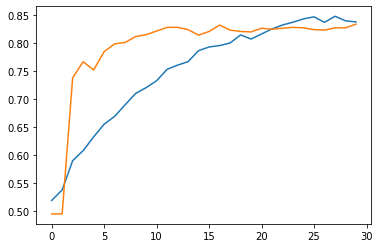

In [ ]:
#graph
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [ ]:
#saccuracy
train_scores = modelontop.evaluate(X_train, y_train, verbose=0)
test_scores = modelontop.evaluate(X_test, y_test, verbose=0)

print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train loss: 0.25175851015914147
Train accuracy: 0.8979036
Test loss: 0.40831344215237364
Test accuracy: 0.8334694


accuracy has been increased drastically , after using ResNet50V2.


Instead, we're going to set *all* layers in the original network to be non-trainable (this is also oftentimes refered to as freezing the layers), so that only the layers we've added on top will be trainable.

#Hypertuninung

In [ ]:
#not importin all layers
model_hyp = ResNet50V2(weights='imagenet', include_top=False)
model_hyp.output

Instructions for updating:
Colocations handled automatically by placer.


94668760/94668760 [==============================] - 1s 0us/step


<tf.Tensor 'post_relu/Relu:0' shape=(None, None, None, 2048) dtype=float32>

In [ ]:
# new layers
x = model_hyp.output
x = GlobalAveragePooling2D()(x)
x = Dense(200, activation='relu')(x)
x = Dropout(0.25)(x)
predictions = Dense(2, activation='softmax')(x)

fullmodel = Model(inputs=model_hyp.input, outputs=predictions)
# freeze layers 
for layer in model_hyp.layers:
    layer.trainable = False

fullmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


## Original size input


In [ ]:
# split  data , passing original input size
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.25)

In [ ]:
#running model
batch_size = 50
epochs     = 30

hist = fullmodel.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          verbose=0)
# results
train_scores = fullmodel.evaluate(X_train, y_train, verbose=0)
test_scores = fullmodel.evaluate(X_test, y_test, verbose=0)

print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


Train loss: 0.6540661015949196
Train accuracy: 0.87857336
Test loss: 0.8915889722473768
Test accuracy: 0.8579592


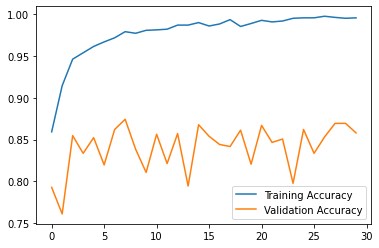

In [ ]:
#graphs 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

# 

# Mobile Net

# reference https://towardsdatascience.com/transfer-learning-using-mobilenet-and-keras-c75daf7ff299

In [ ]:
#importing mibilenet
from tensorflow.keras.applications import mobilenet


In [ ]:
#preprocessing
basepath = 'Accident Images Analysis Dataset/'

def prepare_images(path, num_classes, preprocessor, load_img_kwargs={}, ext='.jpg'):
  X, y = [], []
  for class_ in range(num_classes):
    for img_path in iglob(path + str(class_ + 1) + '/' + '*' + ext):
      img = image.load_img(img_path, **load_img_kwargs)
      x = image.img_to_array(img)
      x = preprocessor(x)
      X.append(x)
      y.append(class_)
  return np.array(X), np.array(y)

In [ ]:
# preprocessing image to match input requiremtnt
X, y = prepare_images(basepath + 'Accident -Detection/', 2, mobilenet.preprocess_input, load_img_kwargs={'target_size': (224, 224)})
y_cat = to_categorical(y)

len(X), len(y), np.unique(y)


(4898, 4898, array([0, 1]))

In [ ]:
#IMporting MobileNet
from tensorflow.keras.applications import MobileNet
model = MobileNet(weights='imagenet', include_top=True)
model.output

Instructions for updating:
Colocations handled automatically by placer.


17225924/17225924 [==============================] - 2s 0us/step


<tf.Tensor 'predictions/Softmax:0' shape=(None, 1000) dtype=float32>

In [ ]:
#output
output = model.predict(X)
output.shape

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


(4898, 1000)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(output, y_cat, test_size=0.25)

In [ ]:
#definign model archtecture
mobiletop = Sequential()
mobiletop.add(Dense(20, input_dim=1000, activation='relu'))
mobiletop.add(BatchNormalization())
mobiletop.add(Dropout(0.5))
mobiletop.add(Dense(15, activation='relu'))
mobiletop.add(BatchNormalization())
mobiletop.add(Dropout(0.5))
mobiletop.add(Dense(8, activation='relu'))
mobiletop.add(Dropout(0.5))
mobiletop.add(Dense(2, activation='softmax'))
mobiletop.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#modelontop.summary()

In [ ]:
# fitting model
batch_size = 50
epochs     = 30

mobile = mobiletop.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          verbose=2)

Train on 3673 samples, validate on 1225 samples
Epoch 1/30
3673/3673 - 1s - loss: 0.3904 - accuracy: 0.8541 - val_loss: 0.3174 - val_accuracy: 0.8637 - 936ms/epoch - 255us/sample
Epoch 2/30
3673/3673 - 1s - loss: 0.3824 - accuracy: 0.8505 - val_loss: 0.3300 - val_accuracy: 0.8620 - 1s/epoch - 295us/sample
Epoch 3/30
3673/3673 - 1s - loss: 0.3902 - accuracy: 0.8454 - val_loss: 0.3125 - val_accuracy: 0.8694 - 1s/epoch - 340us/sample
Epoch 4/30
3673/3673 - 1s - loss: 0.3900 - accuracy: 0.8530 - val_loss: 0.3122 - val_accuracy: 0.8686 - 827ms/epoch - 225us/sample
Epoch 5/30
3673/3673 - 0s - loss: 0.3792 - accuracy: 0.8484 - val_loss: 0.3180 - val_accuracy: 0.8669 - 370ms/epoch - 101us/sample
Epoch 6/30
3673/3673 - 0s - loss: 0.3701 - accuracy: 0.8524 - val_loss: 0.3478 - val_accuracy: 0.8482 - 398ms/epoch - 108us/sample
Epoch 7/30
3673/3673 - 0s - loss: 0.3660 - accuracy: 0.8628 - val_loss: 0.3086 - val_accuracy: 0.8678 - 368ms/epoch - 100us/sample
Epoch 8/30
3673/3673 - 0s - loss: 0.3605 

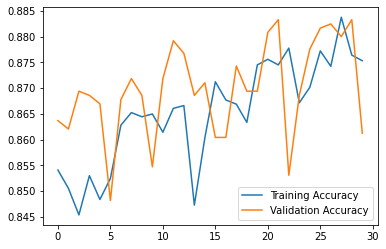

In [ ]:
# visualize results
plt.plot(mobile.history['accuracy'])
plt.plot(mobile.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [ ]:
train_scores = mobiletop.evaluate(X_train, y_train, verbose=0)
test_scores = mobiletop.evaluate(X_test, y_test, verbose=0)

print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train loss: 0.22791745328072335
Train accuracy: 0.90525454
Test loss: 0.36432978038885155
Test accuracy: 0.8612245


#Hypertuning the archtecture

In [ ]:
#  split data
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.25)

In [ ]:
mobile_hyp = MobileNet(weights='imagenet', include_top=False)
mobile_hyp.output

<tf.Tensor 'conv_pw_13_relu_2/Relu6:0' shape=(None, None, None, 1024) dtype=float32>

In [ ]:
#definig arhcitecture
x = mobile_hyp.output
x = GlobalAveragePooling2D()(x)
x = Dense(200, activation='relu')(x)
x = Dropout(0.25)(x)
predictions = Dense(2, activation='softmax')(x)

mobilefullmodel = Model(inputs=mobile_hyp.input, outputs=predictions)
# freeze layers 
for layer in mobile_hyp.layers:
    layer.trainable = False

mobilefullmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fitting model
batch_size = 50
epochs     = 30

mob_fnl = mobilefullmodel.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          verbose=2)
# results
train_scores = mobilefullmodel.evaluate(X_train, y_train, verbose=0)
test_scores = mobilefullmodel.evaluate(X_test, y_test, verbose=0)

print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train on 3673 samples, validate on 1225 samples
Epoch 1/30


`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


3673/3673 - 10s - loss: 0.4844 - accuracy: 0.8075 - val_loss: 0.6666 - val_accuracy: 0.6000 - 10s/epoch - 3ms/sample
Epoch 2/30
3673/3673 - 7s - loss: 0.2785 - accuracy: 0.8808 - val_loss: 1.0232 - val_accuracy: 0.5241 - 7s/epoch - 2ms/sample
Epoch 3/30
3673/3673 - 7s - loss: 0.2149 - accuracy: 0.9118 - val_loss: 1.1889 - val_accuracy: 0.5208 - 7s/epoch - 2ms/sample
Epoch 4/30
3673/3673 - 7s - loss: 0.1987 - accuracy: 0.9178 - val_loss: 0.7458 - val_accuracy: 0.6367 - 7s/epoch - 2ms/sample
Epoch 5/30
3673/3673 - 7s - loss: 0.1717 - accuracy: 0.9325 - val_loss: 1.1336 - val_accuracy: 0.5527 - 7s/epoch - 2ms/sample
Epoch 6/30
3673/3673 - 7s - loss: 0.1305 - accuracy: 0.9491 - val_loss: 1.9479 - val_accuracy: 0.5127 - 7s/epoch - 2ms/sample
Epoch 7/30
3673/3673 - 7s - loss: 0.1401 - accuracy: 0.9445 - val_loss: 1.1029 - val_accuracy: 0.5600 - 7s/epoch - 2ms/sample
Epoch 8/30
3673/3673 - 7s - loss: 0.1183 - accuracy: 0.9586 - val_loss: 2.0944 - val_accuracy: 0.5110 - 7s/epoch - 2ms/sample
E

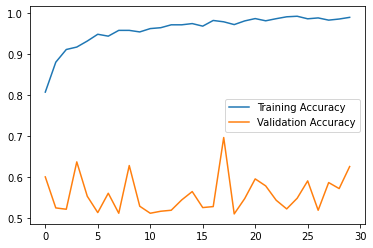

In [ ]:
# visualize results
plt.plot(mob_fnl.history['accuracy'])
plt.plot(mob_fnl.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

# hypertuning archtecture-2

In [ ]:
# definig architecture
x = mobile_hyp.output
x = GlobalAveragePooling2D()(x)
x = Dense(50, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

mobilefullmodel2 = Model(inputs=mobile_hyp.input, outputs=predictions)
# freeze layers 
for layer in mobile_hyp.layers:
    layer.trainable = False

mobilefullmodel2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fitting model
batch_size = 50
epochs     = 30

mob_fnl2 = mobilefullmodel2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          verbose=2)


Train on 3673 samples, validate on 1225 samples
Epoch 1/30
3673/3673 - 8s - loss: 0.4126 - accuracy: 0.8056 - val_loss: 0.5434 - val_accuracy: 0.7069 - 8s/epoch - 2ms/sample
Epoch 2/30
3673/3673 - 6s - loss: 0.3066 - accuracy: 0.8658 - val_loss: 0.5022 - val_accuracy: 0.7502 - 6s/epoch - 2ms/sample
Epoch 3/30
3673/3673 - 6s - loss: 0.2474 - accuracy: 0.9006 - val_loss: 0.5305 - val_accuracy: 0.7167 - 6s/epoch - 2ms/sample
Epoch 4/30
3673/3673 - 6s - loss: 0.2267 - accuracy: 0.9115 - val_loss: 0.6150 - val_accuracy: 0.6612 - 6s/epoch - 2ms/sample
Epoch 5/30
3673/3673 - 6s - loss: 0.2059 - accuracy: 0.9132 - val_loss: 0.7363 - val_accuracy: 0.6245 - 6s/epoch - 2ms/sample
Epoch 6/30
3673/3673 - 6s - loss: 0.1946 - accuracy: 0.9170 - val_loss: 1.2672 - val_accuracy: 0.5388 - 6s/epoch - 2ms/sample
Epoch 7/30
3673/3673 - 6s - loss: 0.1826 - accuracy: 0.9281 - val_loss: 0.7890 - val_accuracy: 0.6482 - 6s/epoch - 2ms/sample
Epoch 8/30
3673/3673 - 6s - loss: 0.1770 - accuracy: 0.9295 - val_loss

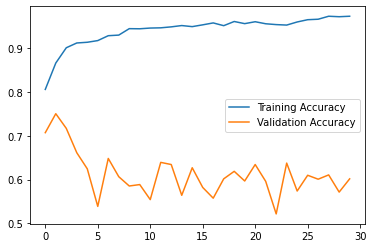

In [ ]:
# visualize
plt.plot(mob_fnl2.history['accuracy'])
plt.plot(mob_fnl2.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

Summary:
as mobile net has very light architecute , it perfoms well with our data, than resnetv2 model which is bit overfitting in this case .

other hand, mobilenet model failed to give us good performace on the testing data ,when we used original dataset